In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## EDA

1. Analyse de data_pricing

In [4]:
#import data
df_price = pd.read_csv('../src/get_around_pricing_project.csv')

In [5]:
# Aperçu données
print(df_price.shape)
df_price.head()

(4843, 15)


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [6]:
# Info de base
print("\nInfos du dataset:")
df_price.info()


Infos du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   b

In [7]:
# Stats descriptives
print("\nStats descriptives:")
print(df_price.describe())


Stats descriptives:
        Unnamed: 0       mileage  engine_power  rental_price_per_day
count  4843.000000  4.843000e+03    4843.00000           4843.000000
mean   2421.000000  1.409628e+05     128.98823            121.214536
std    1398.198007  6.019674e+04      38.99336             33.568268
min       0.000000 -6.400000e+01       0.00000             10.000000
25%    1210.500000  1.029135e+05     100.00000            104.000000
50%    2421.000000  1.410800e+05     120.00000            119.000000
75%    3631.500000  1.751955e+05     135.00000            136.000000
max    4842.000000  1.000376e+06     423.00000            422.000000


In [8]:
# Statistiques sur prix, kilométrage et puissance moteur
print(df_price[['rental_price_per_day', 'mileage', 'engine_power']].describe())

# Distribution marques de voitures
print("\nDistribution des modèles:")
print(df_price['model_key'].value_counts())

# Distribution types de carburant
print("\nDistribution des carburants:")
print(df_price['fuel'].value_counts())

       rental_price_per_day       mileage  engine_power
count           4843.000000  4.843000e+03    4843.00000
mean             121.214536  1.409628e+05     128.98823
std               33.568268  6.019674e+04      38.99336
min               10.000000 -6.400000e+01       0.00000
25%              104.000000  1.029135e+05     100.00000
50%              119.000000  1.410800e+05     120.00000
75%              136.000000  1.751955e+05     135.00000
max              422.000000  1.000376e+06     423.00000

Distribution des modèles:
model_key
Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Min

Observations clés :

Prix de location
- Moyenne: 121€/jour
- Médiane: 119€/jour 
- 50% entre 104€-136€/jour

Anomalies à investiguer
- Kilométrage négatif (-64)
- Puissance moteur à 0

Distribution marché
- Top 5: Citroën, Renault, BMW, Peugeot, Audi (80% du parc)
- Diesel dominant (96%)

Text(0, 0.5, 'Prix moyen par jour (€)')

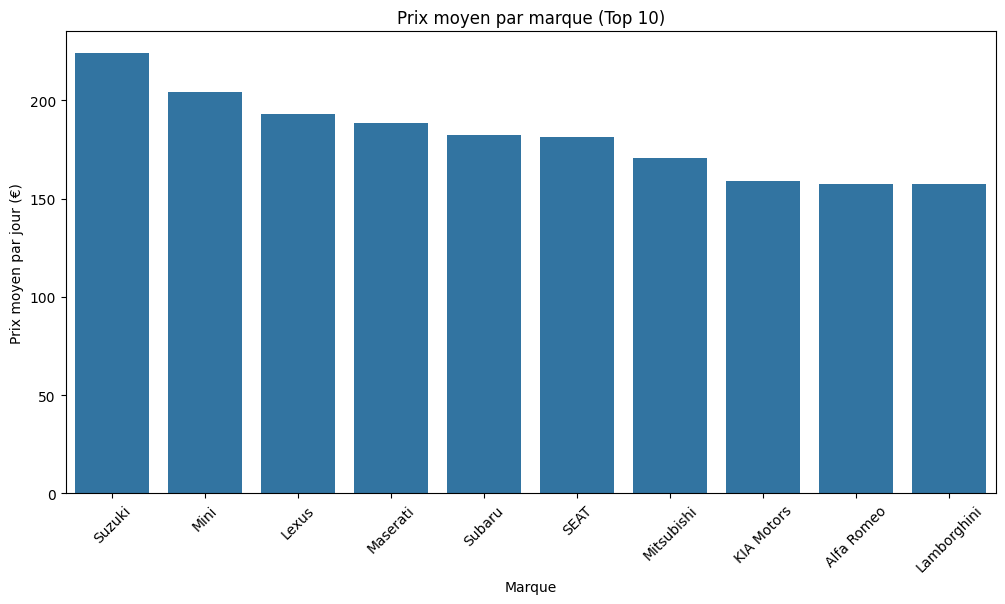

In [9]:
top_10_brands = df_price.groupby('model_key')['rental_price_per_day'].mean().nlargest(10).index

plt.figure(figsize=(12,6))
sns.barplot(data=df_price, 
            x='model_key', 
            y='rental_price_per_day',
            order=top_10_brands,
            errorbar=None)
plt.xticks(rotation=45)
plt.title('Prix moyen par marque (Top 10)')
plt.xlabel('Marque')
plt.ylabel('Prix moyen par jour (€)')

Text(0, 0.5, 'Prix par jour ($)')

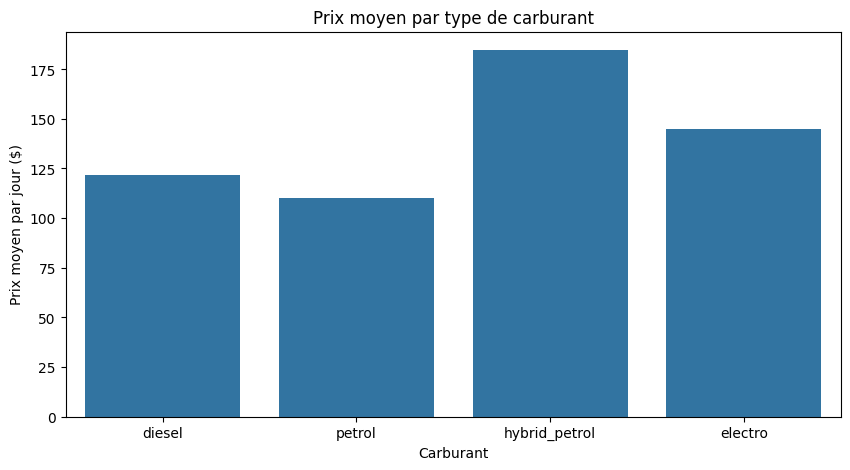

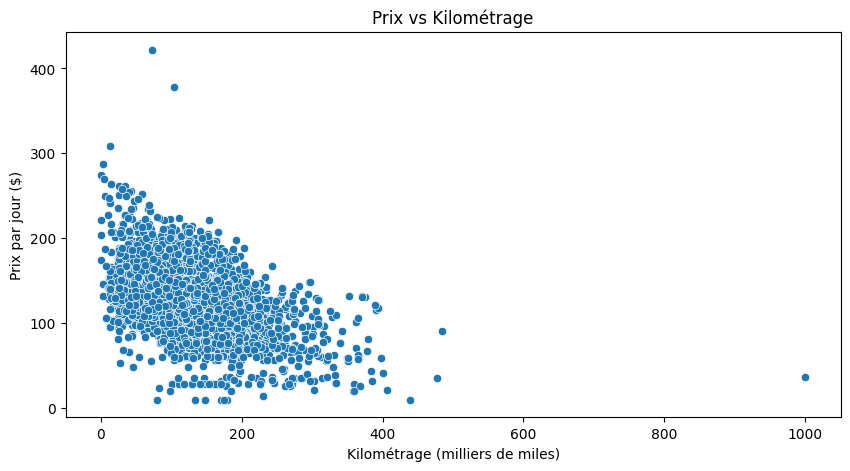

In [10]:
# Prix moyen par type de carburant
plt.figure(figsize=(10,5))
sns.barplot(data=df_price, x='fuel', y='rental_price_per_day', errorbar=None)
plt.title('Prix moyen par type de carburant')
plt.xlabel('Carburant')
plt.ylabel('Prix moyen par jour ($)')

# Convertir le kilométrage en unités plus lisibles (milliers de miles)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_price, x=df_price['mileage']/1000, y='rental_price_per_day')
plt.title('Prix vs Kilométrage')
plt.xlabel('Kilométrage (milliers de miles)')
plt.ylabel('Prix par jour ($)')

Prix vs marques :

Mitsubishi plus cher (~170$/jour)
Peugeot/Citroën moins chers (~110$/jour)
Premium (Audi, BMW) prix moyen

Prix vs carburant:

Hybride plus cher (~175$/jour)
Diesel/essence similaires (~120$/jour)
Électrique intermédiaire (~145$/jour)

Prix vs kilométrage:
Corrélation négative


<Figure size 1200x600 with 0 Axes>

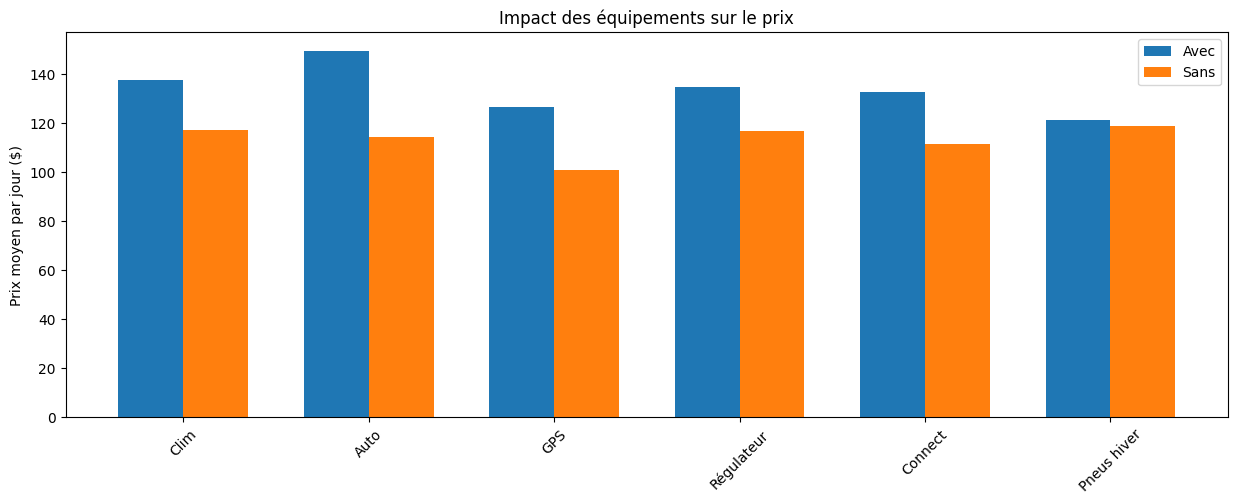

In [11]:
plt.figure(figsize=(12,6))
features = ['has_air_conditioning', 'automatic_car', 'has_gps', 
           'has_speed_regulator', 'has_getaround_connect', 'winter_tires']

plt.figure(figsize=(15,5))
x = np.arange(len(features))
width = 0.35

true_means = [df_price[df_price[f] == True]['rental_price_per_day'].mean() for f in features]
false_means = [df_price[df_price[f] == False]['rental_price_per_day'].mean() for f in features]

plt.bar(x - width/2, true_means, width, label='Avec')
plt.bar(x + width/2, false_means, width, label='Sans')

plt.xticks(x, ['Clim', 'Auto', 'GPS', 'Régulateur', 'Connect', 'Pneus hiver'], rotation=45)
plt.ylabel('Prix moyen par jour ($)')
plt.title('Impact des équipements sur le prix')
plt.legend()

Impact des équipements sur le prix:
- Auto: plus grand impact (+30$)
- GPS: deuxième plus grand écart (+25$ avec vs sans)
- Clim/Régulateur/Connect: impact modéré (+15-20$)
- Pneus hiver: impact minimal (+3$)
- Tous les équipements augmentent le prix moyen

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'black'),
  Text(1, 0, 'grey'),
  Text(2, 0, 'white'),
  Text(3, 0, 'red'),
  Text(4, 0, 'silver'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'beige'),
  Text(8, 0, 'brown'),
  Text(9, 0, 'green')])

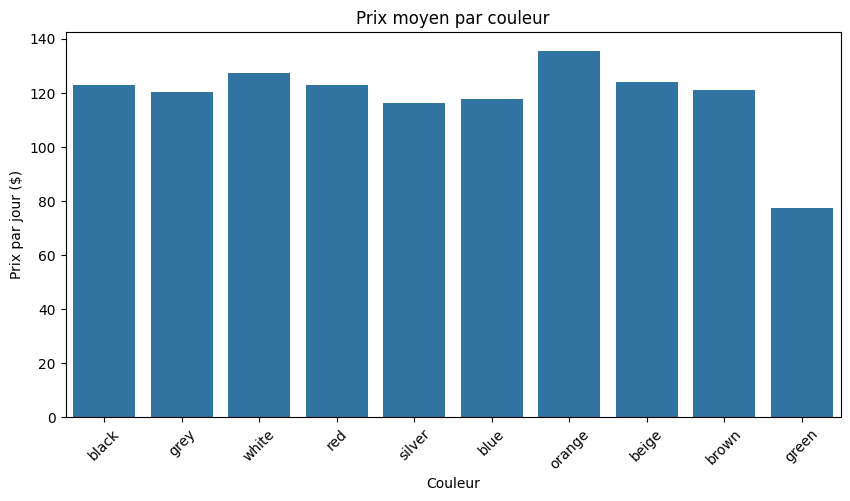

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_price, x='paint_color', y='rental_price_per_day', errorbar=None)
plt.title('Prix moyen par couleur')
plt.xlabel('Couleur')
plt.ylabel('Prix par jour ($)')
plt.xticks(rotation=45)

Orange : plus chère (~135$)
Vert : moins chère (~80$)
Autres : variation faible (115-125$)

### Conclusions générales dataset prix :

Prix moyen : 121$/jour
Impact majeur : marque (Mitsubishi vs Peugeot)
Impact modéré : équipements (GPS, Auto)
Impact faible : couleur, pneus hiver
Carburant : hybrides plus chers

# CLEANING

On a vu lors du discribe certains choses comme des Kilométrage négatif (-64 miles), des puissances à 0, des voitures avec plus d'un millions de miles. Vérifions aussi les doublons et nettoyons tout cela

In [13]:
def check_anomalies(df):
   print("Valeurs négatives/nulles:")
   print("Kilométrage < 0:", sum(df['mileage'] < 0))
   print("Kilométrage > 900k:", sum(df['mileage'] > 900000))
   print("Puissance = 0:", sum(df['engine_power'] == 0))
   
   print("\nDoublons:", df.duplicated().sum())

check_anomalies(df_price)

Valeurs négatives/nulles:
Kilométrage < 0: 1
Kilométrage > 900k: 1
Puissance = 0: 1

Doublons: 0


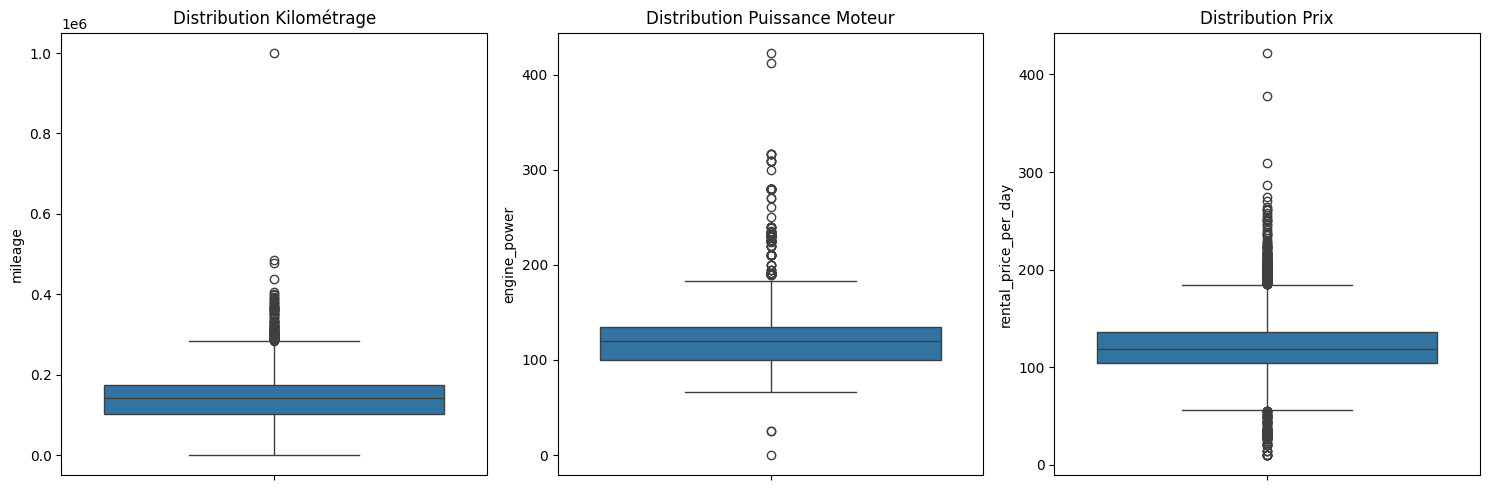

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Kilométrage
sns.boxplot(data=df_price, y='mileage', ax=axes[0])
axes[0].set_title('Distribution Kilométrage')

# Puissance moteur
sns.boxplot(data=df_price, y='engine_power', ax=axes[1])  
axes[1].set_title('Distribution Puissance Moteur')

# Prix
sns.boxplot(data=df_price, y='rental_price_per_day', ax=axes[2])
axes[2].set_title('Distribution Prix')

plt.tight_layout()

In [ ]:
# Création du masque pour filtrer les valeurs aberrantes
mask = (df_price['mileage'] > 0) & (df_price['mileage'] < 900000) & (df_price['engine_power'] > 0)

# Création nouveau dataframe
df_price_clean = df_price[mask]

# Vérification du nettoyage
print("Nombre de lignes avant:", len(df_price))
print("Nombre de lignes après:", len(df_price_clean))

Nombre de lignes avant: 4843
Nombre de lignes après: 4840


In [ ]:
# Sauvegarde du dataframe nettoyé
df_price_clean.to_csv('../src/get_around_pricing_project_clean.csv', index=False)
print("Fichier sauvegardé avec succès")

Fichier sauvegardé avec succès


## ANALYSE DES RETARDS

In [ ]:
# Chargement données retards
df_delay = pd.read_excel('../src/get_around_delay_analysis.xlsx')

# Aperçu 
print(df_delay.shape)
df_delay.head()

(21310, 7)


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [ ]:
# structure des données
print("\nStructure du dataset:")
print(df_delay.info())
print("\nPremières lignes:")
display(df_delay.head())
print("\nStatistiques descriptives:")
print(df_delay.describe())


Structure du dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None

Premières lignes:


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Statistiques descriptives:
           rental_id         car_id  delay_at_checkout_in_minutes  \
count   21310.000000   21310.000000                  16346.000000   
mean   549712.880338  350030.603426                     59.701517   
std     13863.446964   58206.249765                   1002.561635   
min    504806.000000  159250.000000                 -22433.000000   
25%    540613.250000  317639.000000                    -36.000000   
50%    550350.000000  368717.000000                      9.000000   
75%    560468.500000  394928.000000                     67.000000   
max    576401.000000  417675.000000                  71084.000000   

       previous_ended_rental_id  time_delta_with_previous_rental_in_minutes  
count               1841.000000                                 1841.000000  
mean              550127.411733                                  279.288430  
std                13184.023111                                  254.594486  
min               505628.000000       

Points importants sur les retards :

1. Retards au checkout (delay_at_checkout_in_minutes) :
- Médiane : 9 minutes de retard
- 25% sont en avance (-36 minutes)
- 75% ont un retard de 67 minutes ou moins
- Valeurs extrêmes : -22433 à +71084 minutes

2. Temps entre locations (time_delta_with_previous_rental_in_minutes) :
- Médiane : 3h (180 minutes)
- Minimum : 0 minute
- Maximum : 12h (720 minutes)
- 75% ont moins de 9h (540 minutes) entre locations

Analyse à faire :

1. Distribution des retards (histogramme)
2. Retards par type de checkin
3. Impact sur la location suivante

Dans df_delay :

- 21,310 locations au total
- delay_at_checkout_in_minutes : 16,346 non-null (4,964 manquants)
- previous_ended_rental_id : 1,841 non-null (19,469 manquants)
- time_delta_with_previous_rental_in_minutes : 1,841 non-null (19,469 manquants)

Points importants :

- Les valeurs manquantes pour retards (4,964) correspondent probablement aux locations annulées
- Pour les délais entre locations (19,469 manquants) : normal car toutes les voitures n'ont pas de location suivante dans les 12h

Ces manques n'invalident pas notre analyse car :

- Analyse des retards basée sur locations effectives
- Analyse des délais sur locations consécutives réelles

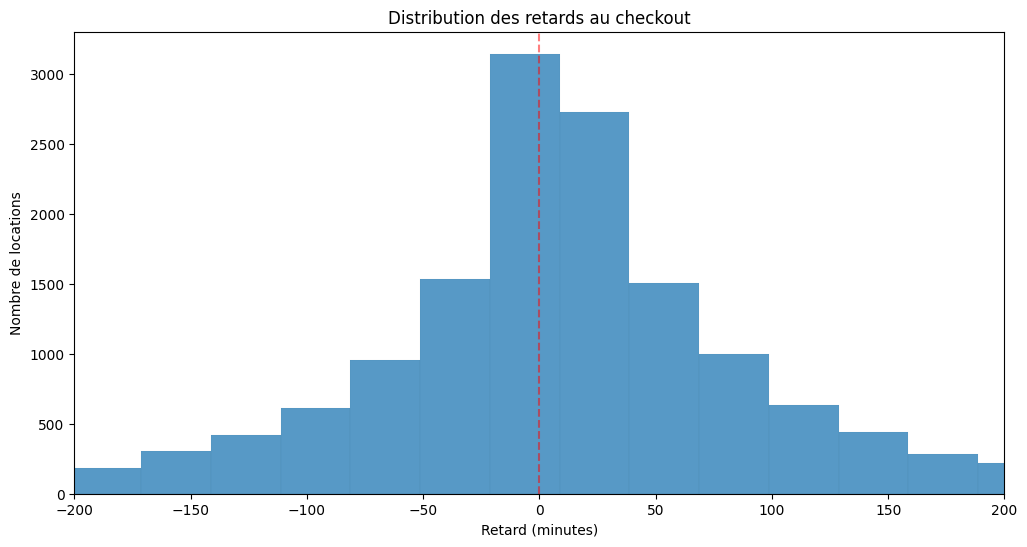

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_delay, x='delay_at_checkout_in_minutes', binwidth=30)
plt.title('Distribution des retards au checkout')
plt.xlabel('Retard (minutes)')
plt.ylabel('Nombre de locations')
plt.xlim(-200, 200)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

Distribution des retards :
1. Distribution normale centrée autour de 0
2. Majorité des locations :
   - Entre -50 et +50 minutes
   - Pic maximal vers 0-30 minutes de retard
3. Plus de retards (côté droit) que d'avances (côté gauche)

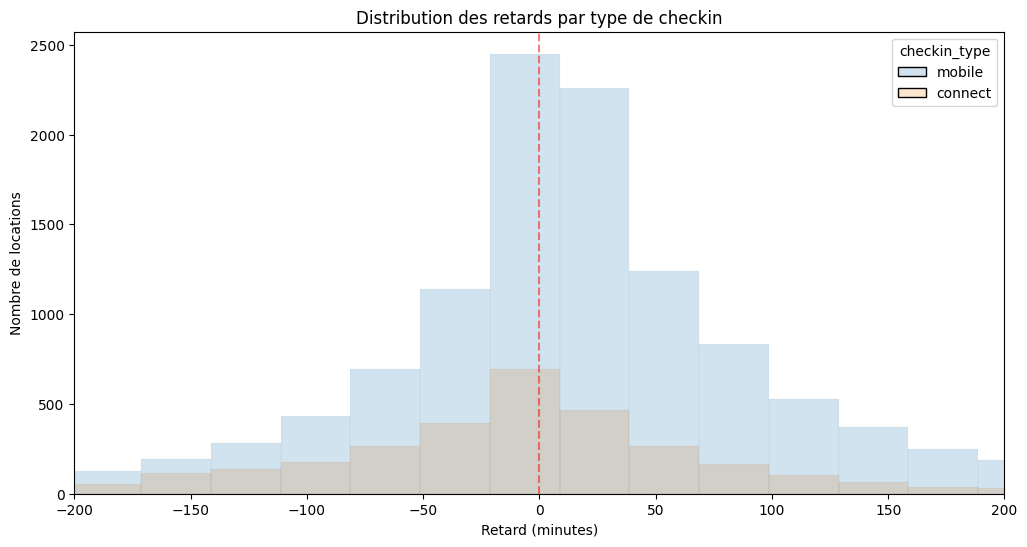

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_delay, 
           x='delay_at_checkout_in_minutes', 
           hue='checkin_type',
           binwidth=30,
           multiple="layer",
           alpha=0.2)
plt.title('Distribution des retards par type de checkin')
plt.xlabel('Retard (minutes)')
plt.ylabel('Nombre de locations')
plt.xlim(-200, 200)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)

Distribution par type de checkin :

1. Volume :
- Mobile : majoritaire (plus de locations)
- Connect : volume plus faible

2. Répartition :
- Les deux types suivent une distribution similaire
- Centrés autour de 0
- Plus de retards que d'avances dans les deux cas

3. Impact opérationnel :
- Le problème de retard existe pour les deux types
- Même profil de distribution, suggérant que le type de checkin n'influence pas significativement le comportement retard


In [ ]:
# Statistiques par type de checkin
print("Statistiques des retards par type de checkin:")
print(df_delay.groupby('checkin_type')['delay_at_checkout_in_minutes'].describe())

# Nombre de locations par type
print("\nNombre de locations par type:")
print(df_delay['checkin_type'].value_counts())

Statistiques des retards par type de checkin:
                count       mean          std      min    25%   50%   75%  \
checkin_type                                                                
connect        3402.0 -43.627278   228.681964  -4276.0 -75.75  -9.0  32.0   
mobile        12944.0  86.858854  1118.944811 -22433.0 -26.00  14.0  77.0   

                  max  
checkin_type           
connect        1466.0  
mobile        71084.0  

Nombre de locations par type:
checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64


Points clés :

1. Volume de locations :
- Mobile : 17,003 locations (80%)
- Connect : 4,307 locations (20%)

2. Statistiques des retards :
Mobile :
- Médiane : +14 minutes de retard
- 75% sous 77 minutes
- Plus grande variabilité (std=1119 min)
- Extrêmes : -22433 à +71084 min

3. Connect :
- Médiane : -9 minutes (en avance!)
- 75% sous 32 minutes
- Moins de variabilité (std=229 min)
- Extrêmes : -4276 à +1466 min

Conclusion : Les locations Connect semblent plus ponctuelles que les locations Mobile.

Statistiques délai entre locations:


Text(0, 0.5, 'Nombre de locations')

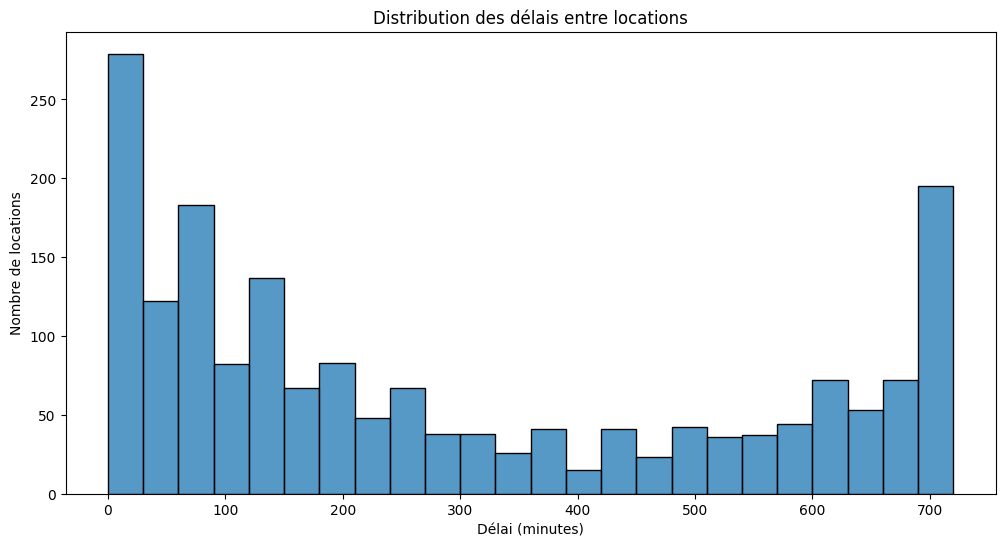

In [ ]:
# Statistiques du délai entre locations
print("Statistiques délai entre locations:")
df_delay['time_delta_with_previous_rental_in_minutes'].describe()

# Distribution des délais
plt.figure(figsize=(12,6))
sns.histplot(data=df_delay, x='time_delta_with_previous_rental_in_minutes', binwidth=30)
plt.title('Distribution des délais entre locations')
plt.xlabel('Délai (minutes)')
plt.ylabel('Nombre de locations')

Observations clés sur les délais entre locations :

1. Distribution :
- Pic important aux délais courts (0-50 minutes)
- Deuxième pic vers 720 minutes (12 heures)
- Décroissance progressive entre les deux

2. Points critiques :
- Nombreuses locations enchaînées rapidement (<100 minutes)
- Risque élevé d'impact des retards sur location suivante
- Peu de marge de sécurité dans les délais courts

(0.0, 720.0)

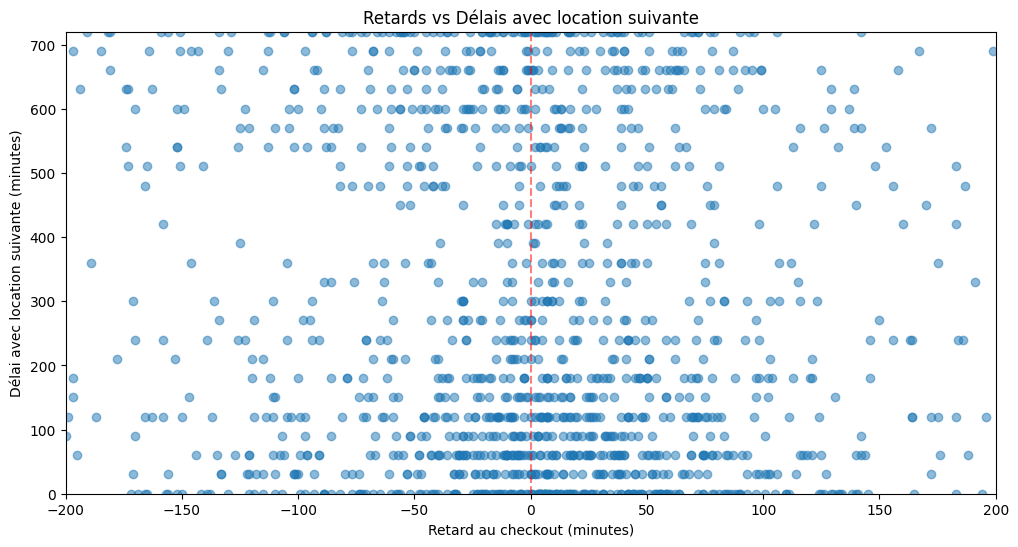

In [ ]:
# Relation entre retards et délais
plt.figure(figsize=(12,6))
plt.scatter(df_delay['delay_at_checkout_in_minutes'], 
          df_delay['time_delta_with_previous_rental_in_minutes'],
          alpha=0.5)
plt.title('Retards vs Délais avec location suivante')
plt.xlabel('Retard au checkout (minutes)')
plt.ylabel('Délai avec location suivante (minutes)')
plt.axvline(x=0, color='r', linestyle='--', alpha=0.5)
# Limiter la vue pour plus de lisibilité
plt.xlim(-200, 200)
plt.ylim(0, 720)

Observons le nuage de points :

1. Concentration des données :
- Forte densité de points autour de 0 minute de retard
- Beaucoup de locations avec délais courts (<100 min)
- Délais fréquents vers 180 min (3h) et 720 min (12h)

2. Zones critiques :
- Nombreuses locations enchaînées (bas du graphique)
- Retards (points à droite de la ligne rouge) avec délais courts = risque élevé d'impact
- Même les petits retards peuvent affecter la location suivante quand le délai est court

3. Conclusion :
- Un délai minimum entre locations semble nécessaire pour absorber les retards
- Focus particulier sur les locations à délai court qui sont nombreuses

## CONCLUSIONS PARTIELLES

Basé sur nos analyses, voici les recommandations :

1. Fréquence des retards et impact :
- Mobile : médiane +14min de retard
- Connect : médiane -9min (plus ponctuel)
- 75% des locations Connect sous 32min de retard
- Plus grande variabilité en Mobile

2. Délais entre locations :
- Beaucoup de locations avec délais courts (<100min)
- Pics à 3h et 12h
- Délais courts = risque élevé d'impact des retards

3. Recommandations :
Pour le seuil :
- Minimum 30min pour Connect (couvre 75% des retards)
- Minimum 60min pour Mobile (plus variable)

Pour le scope :
- Priorité sur Mobile (80% des locations, plus de retards)
- Optionnel sur Connect (meilleure ponctualité)

# IMPACT COMMERCIAL


Calculons l'impact précis sur le nombre de locations affectées selon ces seuils :

In [ ]:
# Impact par type de checkin avec seuils différenciés
impact_mobile = df_delay[
    (df_delay['checkin_type'] == 'mobile') & 
    (df_delay['time_delta_with_previous_rental_in_minutes'] < 60)
].shape[0]

impact_connect = df_delay[
    (df_delay['checkin_type'] == 'connect') & 
    (df_delay['time_delta_with_previous_rental_in_minutes'] < 30)
].shape[0]

print("Nombre de locations Mobile affectées (seuil 60min):", impact_mobile)
print("% Mobile affecté:", (impact_mobile/len(df_delay[df_delay['checkin_type'] == 'mobile']))*100)

print("\nNombre de locations Connect affectées (seuil 30min):", impact_connect)
print("% Connect affecté:", (impact_connect/len(df_delay[df_delay['checkin_type'] == 'connect']))*100)

Nombre de locations Mobile affectées (seuil 60min): 220
% Mobile affecté: 1.2938893136505323

Nombre de locations Connect affectées (seuil 30min): 131
% Connect affecté: 3.0415602507545856


Impact faible sur le volume global des locations :
1. Mobile (seuil 60min)
- 220 locations impactées
- Seulement 1.3% du total Mobile

2. Connect (seuil 30min)
- 131 locations impactées
- 3% du total Connect

Ces chiffres sont encourageants car:
- Impact minimal sur le business (~2% total)
- Bénéfice potentiel élevé (réduction des retards problématiques)
- Seuils différenciés adaptés aux comportements



Text(0, 0.5, 'Montant ($)')

<Figure size 1000x600 with 0 Axes>

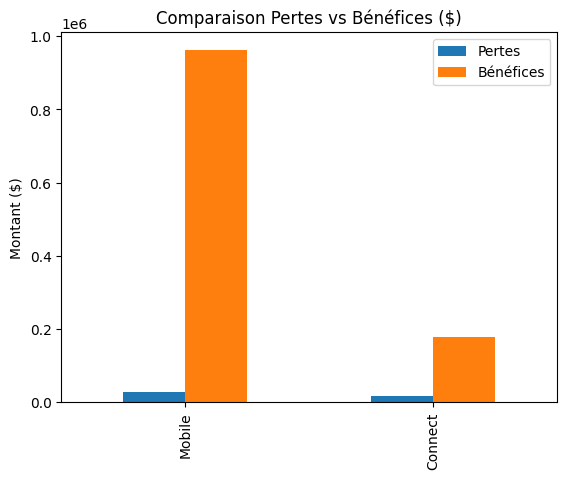

In [ ]:
# Prix moyen global
prix_moyen = df_price_clean['rental_price_per_day'].mean()

# Calcul des impacts
# Pertes (locations bloquées)
impact_mobile = len(df_delay[
   (df_delay['checkin_type'] == 'mobile') & 
   (df_delay['time_delta_with_previous_rental_in_minutes'] < 60)
]) * prix_moyen

impact_connect = len(df_delay[
   (df_delay['checkin_type'] == 'connect') & 
   (df_delay['time_delta_with_previous_rental_in_minutes'] < 30)
]) * prix_moyen

# Bénéfices (locations sauvées des retards)
benefice_mobile = len(df_delay[
   (df_delay['checkin_type'] == 'mobile') & 
   (df_delay['delay_at_checkout_in_minutes'] > 0)
]) * prix_moyen

benefice_connect = len(df_delay[
   (df_delay['checkin_type'] == 'connect') & 
   (df_delay['delay_at_checkout_in_minutes'] > 0)
]) * prix_moyen

# Visualisation
data = {
   'Pertes': [impact_mobile, impact_connect],
   'Bénéfices': [benefice_mobile, benefice_connect]
}

plt.figure(figsize=(10,6))
df_plot = pd.DataFrame(data, index=['Mobile', 'Connect'])
df_plot.plot(kind='bar')
plt.title('Comparaison Pertes vs Bénéfices ($)')
plt.ylabel('Montant ($)')

rappel :  1e6 = 1 × 10^6 donc : 

Mobile :
Pertes ~25k$
Bénéfices ~950k$


Connect :
Pertes ~15k$
Bénéfices ~180k$

## CONCLUSIONS GENERALES ET RECOMMENDATIONS

D'après nos analyses, voici les conclusions et recommandations :

1. État des lieux :
- Mobile (80% des locations) : médiane +14min de retard
- Connect (20% des locations) : médiane -9min de retard
- Corrélation négative prix/kilométrage
- Impact équipements sur prix (+15-30$)

2. Recommandations :
- Seuil minimum différencié :
  * Mobile : 60 minutes (plus de retards)
  * Connect : 30 minutes (plus ponctuel)

3. Impact business :
- Faible impact sur volume :
  * Mobile : 1.3% locations affectées
  * Connect : 3% locations affectées
- Ratio bénéfices/pertes très favorable :
  * Mobile : 950k$ vs 25k$
  * Connect : 180k$ vs 15k$

4. Proposition finale :
Implémenter les seuils différenciés car :
- Impact minimal sur le business
- Forte réduction des problèmes de retard
- Meilleure satisfaction client
- ROI positif